## Problem statement<br>

I'm interested in learning about the **emerging trends in hair products** and the leading companies in the **hair category**, as well as understanding customer feedback about their products. This information is crucial as I aim to develop a **hair product** that rivals those of the top companies and meets the needs of customers effectively.

## About the data

This is a review of **Mamaearth Rosemary Oil** from Amazon, showcasing the product from one of the emerging companies in the hair category. Rosemary is gaining prominence in the hair category for its potential benefits in addressing various hair issues.

<br>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepak.koli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deepak.koli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Loading the Dataset

In [3]:
df = pd.read_csv('mama earth rosemary.csv')

In [4]:
df1 = df.copy()

## Data Cleaning and Visualizing the data.

In [5]:
df1

,a-icon-alt,a-size-base,a-size-base 2,a-size-base 3
0,1.0 out of 5 stars,Not good,Reviewed in India on 31 October 2023,"Its my personal experience, I did mistake of u..."
1,1.0 out of 5 stars,Spoilt my scalp,Reviewed in India on 30 October 2023,I got scalp scars and bleeding post applicatio...
2,5.0 out of 5 stars,Good,Reviewed in India on 28 October 2023,Good delivery & Product
3,4.0 out of 5 stars,Everything you should know about mamaearth ros...,Reviewed in India on 27 October 2023,The mamaearth rosemary hair oil is very nice w...
4,5.0 out of 5 stars,Worth buying,Reviewed in India on 26 October 2023,A great product to reduce hairfall
...,...,...,...,...
95,5.0 out of 5 stars,Very Effective,Reviewed in India on 4 July 2023,"I recently gave Mama Earth Rosemary Oil a try,..."
96,5.0 out of 5 stars,Amazing oil,Reviewed in India on 3 July 2023,"Amazing oil reduces hairfall ,strengthen the h..."
97,5.0 out of 5 stars,Best hair oil,Reviewed in India on 3 July 2023,Fragrance of this oil is good and it give shin...
98,5.0 out of 5 stars,High quality product,Reviewed in India on 3 July 2023,This is amazing hair oil by mamaearth. Packagi...


**Renaming** the columns for clearer comprehension.

In [6]:
df1.rename(columns = {"a-icon-alt": "ratings", "a-size-base": "short_state", "a-size-base 2": "date", "a-size-base 3": "statements" }, inplace = True)

In [7]:
df1

,ratings,short_state,date,statements
0,1.0 out of 5 stars,Not good,Reviewed in India on 31 October 2023,"Its my personal experience, I did mistake of u..."
1,1.0 out of 5 stars,Spoilt my scalp,Reviewed in India on 30 October 2023,I got scalp scars and bleeding post applicatio...
2,5.0 out of 5 stars,Good,Reviewed in India on 28 October 2023,Good delivery & Product
3,4.0 out of 5 stars,Everything you should know about mamaearth ros...,Reviewed in India on 27 October 2023,The mamaearth rosemary hair oil is very nice w...
4,5.0 out of 5 stars,Worth buying,Reviewed in India on 26 October 2023,A great product to reduce hairfall
...,...,...,...,...
95,5.0 out of 5 stars,Very Effective,Reviewed in India on 4 July 2023,"I recently gave Mama Earth Rosemary Oil a try,..."
96,5.0 out of 5 stars,Amazing oil,Reviewed in India on 3 July 2023,"Amazing oil reduces hairfall ,strengthen the h..."
97,5.0 out of 5 stars,Best hair oil,Reviewed in India on 3 July 2023,Fragrance of this oil is good and it give shin...
98,5.0 out of 5 stars,High quality product,Reviewed in India on 3 July 2023,This is amazing hair oil by mamaearth. Packagi...


Checking the **data types** of the dataset.

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ratings      100 non-null    object
 1   short_state  100 non-null    object
 2   date         100 non-null    object
 3   statements   100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [67]:
df1.head()

,ratings,short_state,date,statements,month,month_year,sentiment
0,1.0,Not good,2023-10-31,"Its my personal experience, I did mistake of using this oil.....After using this oil, I became bald....All hairs started going in young age by this oil",October,Oct-2023,Negative
1,1.0,Spoilt my scalp,2023-10-30,I got scalp scars and bleeding post application and hair wash.. dandruff increased like hell and increased my hairfall . please stop using this product as it's full of chemical,October,Oct-2023,Negative
2,5.0,Good,2023-10-28,Good delivery & Product,October,Oct-2023,Positive
3,4.0,Everything you should know about mamaearth rosemary hair oil,2023-10-27,The mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it's fragnce is also gentle.And it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem.,October,Oct-2023,Positive
4,5.0,Worth buying,2023-10-26,A great product to reduce hairfall,October,Oct-2023,Positive


The **ratings column** should ideally be in **integer or float datatype**, but it is currently classified as **object**. Similarly, the **date column** should be in **datetime datatype**, yet it is also classified as **object**. To better comprehend the data, I need to adjust the data types and clean it accordingly.

In [11]:
df1["ratings"] = df1['ratings'].str.replace(' out of 5 stars', '')
df1["date"] = df1['date'].str.replace("Reviewed in India on", "")
df1['date'] = pd.to_datetime(df1['date'])
df1['month'] = df1['date'].dt.month_name()
df1['ratings'] = df1['ratings'].astype(float)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ratings      100 non-null    float64       
 1   short_state  100 non-null    object        
 2   date         100 non-null    datetime64[ns]
 3   statements   100 non-null    object        
 4   month        100 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 4.0+ KB


In [12]:
df1

,ratings,short_state,date,statements,month
0,1.0,Not good,2023-10-31,"Its my personal experience, I did mistake of u...",October
1,1.0,Spoilt my scalp,2023-10-30,I got scalp scars and bleeding post applicatio...,October
2,5.0,Good,2023-10-28,Good delivery & Product,October
3,4.0,Everything you should know about mamaearth ros...,2023-10-27,The mamaearth rosemary hair oil is very nice w...,October
4,5.0,Worth buying,2023-10-26,A great product to reduce hairfall,October
...,...,...,...,...,...
95,5.0,Very Effective,2023-07-04,"I recently gave Mama Earth Rosemary Oil a try,...",July
96,5.0,Amazing oil,2023-07-03,"Amazing oil reduces hairfall ,strengthen the h...",July
97,5.0,Best hair oil,2023-07-03,Fragrance of this oil is good and it give shin...,July
98,5.0,High quality product,2023-07-03,This is amazing hair oil by mamaearth. Packagi...,July


From the dataset above, it's apparent that there are **reviews from 2023** in the date columns, along with their corresponding ratings. To **enhance visualization and analyze rating trends** more effectively, we can add a column with a **year and month format**. This would allow us to observe the rating patterns for each month throughout the year.

In [17]:
df1['month_year'] = df1['date'].dt.strftime('%b-%Y')

In [18]:
df1.head()

,ratings,short_state,date,statements,month,month_year
0,1.0,Not good,2023-10-31,"Its my personal experience, I did mistake of u...",October,Oct-2023
1,1.0,Spoilt my scalp,2023-10-30,I got scalp scars and bleeding post applicatio...,October,Oct-2023
2,5.0,Good,2023-10-28,Good delivery & Product,October,Oct-2023
3,4.0,Everything you should know about mamaearth ros...,2023-10-27,The mamaearth rosemary hair oil is very nice w...,October,Oct-2023
4,5.0,Worth buying,2023-10-26,A great product to reduce hairfall,October,Oct-2023


Understanding the total count of each rating for each product.

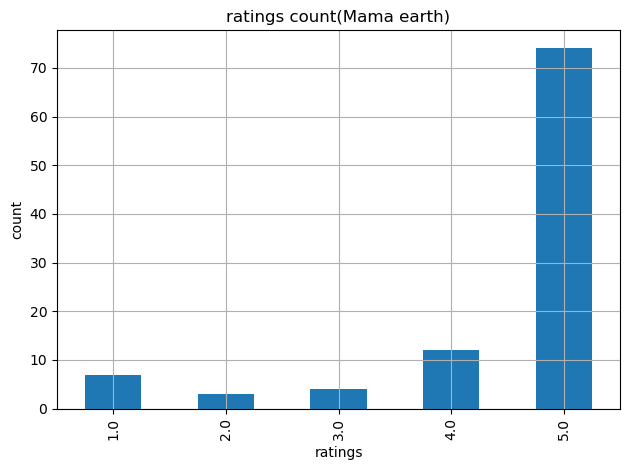

In [68]:
df1['ratings'].value_counts().reset_index().sort_values(by = 'ratings', ascending = True).plot(kind = 'bar', x = 'ratings',
                                                                                              y = 'count', legend = False, grid = True)

plt.title("ratings count(Mama earth)")
plt.xlabel('ratings')
plt.ylabel('count')
plt.tight_layout()
plt.show()

I would like to understand the rating trends for the product on a monthly basis.

In [21]:
df1.groupby('month_year')['ratings'].mean().reset_index()

,month_year,ratings
0,Aug-2023,4.368421
1,Jul-2023,4.826087
2,Oct-2023,3.769231
3,Sep-2023,4.045455


We have obtained the ratings for each month from the dataframe above, but the issue is that they are not in chronological order.
<br>

We'll organize the ratings in chronological order and then plot them to visualize the rating patterns for each month.

In [22]:
month_year = df1.groupby('month_year')['ratings'].mean().reset_index()

In [23]:
month_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month_year  4 non-null      object 
 1   ratings     4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


**Note**: We can resolve this by utilizing pd.Categorical. However, in this notebook, we'll focus on converting the datatype of the column and arranging it in chronological order.

In [24]:
month_year['month_year'] = pd.to_datetime(month_year['month_year'])
month_year['month'] = month_year['month_year'].dt.strftime("%b-%y")
month_year.sort_values(by = 'month_year', inplace = True)

C:\Users\Deepak.koli\AppData\Local\Temp\ipykernel_28112\3402523198.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  month_year['month_year'] = pd.to_datetime(month_year['month_year'])


In [26]:
month_year

,month_year,ratings,month
1,2023-07-01,4.826087,Jul-23
0,2023-08-01,4.368421,Aug-23
3,2023-09-01,4.045455,Sep-23
2,2023-10-01,3.769231,Oct-23


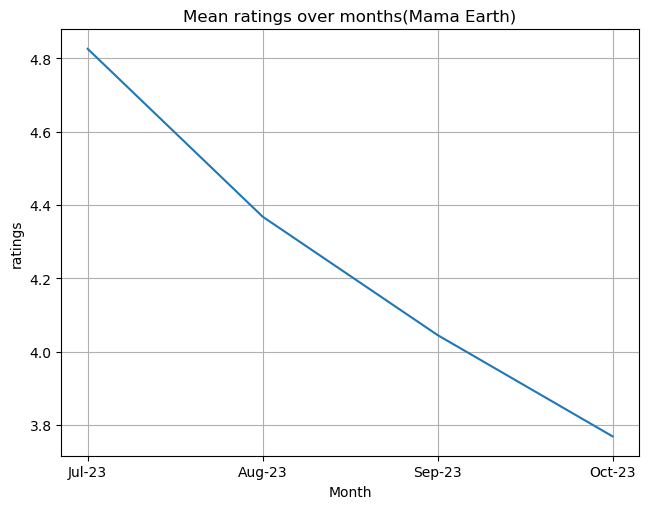

In [27]:
plt.plot(month_year['month'], month_year['ratings'])
plt.tight_layout()
plt.grid(True)
plt.title('Mean ratings over months(Mama Earth)')
plt.xlabel('Month')
plt.ylabel('ratings')
plt.show()

Interesting observation from the line plot: the mean rating is continuously decreasing. Additionally, from the bar plot depicting rating counts, it's apparent that the majority of ratings are 5 stars. This suggests that the product was generally well-received by customers.

So we have to dig deeper and see whatare the reason from this and what exactly people are saying and majority of 5 star rating is coming from which month

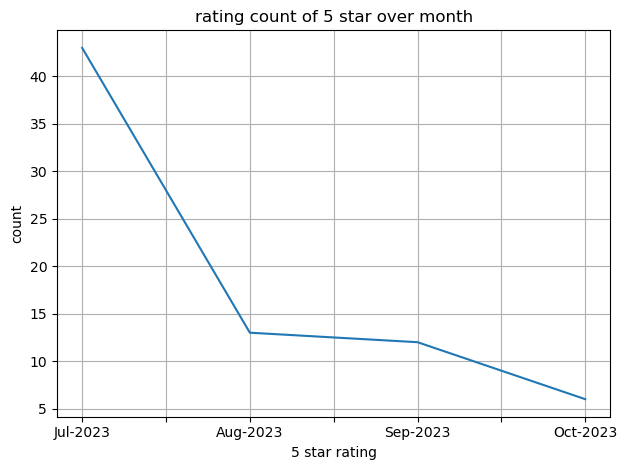

In [42]:
df1[df1['ratings'].isin([5.0]) ]['month_year'].value_counts().reset_index().plot(kind = 'line', x = 'month_year', y = 'count',
                                                                                legend = False, grid = True)

plt.title("rating count of 5 star over month")
plt.xlabel('5 star rating')
plt.ylabel('count')
plt.tight_layout()
plt.show()

Based on the visualization of 5-star ratings for each month, it appears that the product was well-received in July. However, over time, it seems that customers either became dissatisfied with the product or found better alternatives.(Assumption)

#### Creating a Sentiment column to categorize as positive, negative, or neutral, providing further insight into the product.

We are assuming that **ratings of 5 and 4** signify **positive** feedback, while a **rating of 3** is considered **neutral**, and **ratings of 1 and 2** are deemed **negative**. This approach helps us create a clearer **visualization of sentiment**. While I acknowledge that **alternative methods** such as building a **sentiment analysis model or utilizing NLTK or Vader modules exist**, those are separate challenges.

In [43]:
def sentiment(rating):
    if rating == 1.0 or rating == 2.0:
        return "Negative"
    elif rating == 3.0:
        return "Neutral"
    else:
        return "Positive"


In [44]:
df1['sentiment'] = df1['ratings'].apply(sentiment)

In [70]:
df1.head()

,ratings,short_state,date,statements,month,month_year,sentiment
0,1.0,Not good,2023-10-31,"Its my personal experience, I did mistake of using this oil.....After using this oil, I became bald....All hairs started going in young age by this oil",October,Oct-2023,Negative
1,1.0,Spoilt my scalp,2023-10-30,I got scalp scars and bleeding post application and hair wash.. dandruff increased like hell and increased my hairfall . please stop using this product as it's full of chemical,October,Oct-2023,Negative
2,5.0,Good,2023-10-28,Good delivery & Product,October,Oct-2023,Positive
3,4.0,Everything you should know about mamaearth rosemary hair oil,2023-10-27,The mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it's fragnce is also gentle.And it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem.,October,Oct-2023,Positive
4,5.0,Worth buying,2023-10-26,A great product to reduce hairfall,October,Oct-2023,Positive


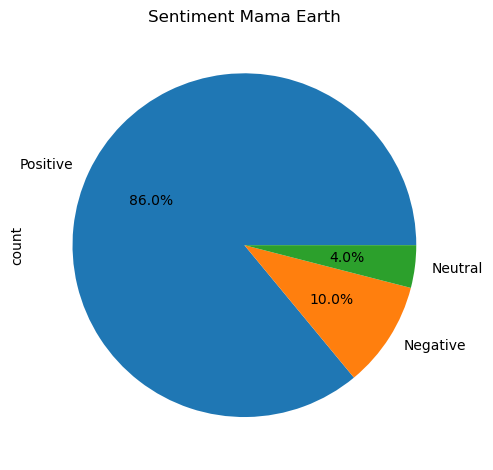

In [45]:
df1['sentiment'].value_counts().plot(kind = 'pie', autopct = "%1.1f%%")
plt.title("Sentiment Mama Earth")
plt.tight_layout()
plt.show()


# Word Cloud

In [12]:
pd.set_option('display.max_colwidth', None)

We will proceed to visualize customer feedback through word clouds, primarily focusing on what customers are expressing about the product. Therefore, we will generate two word clouds: one representing **positive sentiments** and another representing **negative sentiments**, allowing us to gain insights into customer opinions regarding the product.

## Negative feedback 

In [48]:
negative = df1[df1['ratings'].isin([1.0, 2.0])]['statements']
negative = ' '.join(negative)
negative = negative.lower()
negative

"its my personal experience, i did mistake of using this oil.....after using this oil, i became bald....all hairs started going in young age by this oil i got scalp scars and bleeding post application and hair wash.. dandruff increased like hell and increased my hairfall . please stop using this product as it's full of chemical the product has coconut oil as base with just a little rosemry and other oils . so it's just a coconut oil mixed with little drop of oils mentioned . . gave me more dandruff, hair fall not stopped and no new hair in hair folliclesm just a marketing gimmick and oil has nothing like new hairs or hair fall control. .avoid paid reviews in such products as it will impact your pocket during these inflation times using, smells good waiting for result. .. had to face issues after using this oil. dandruff  problem and itching. i have used other rosemary oil products and i could tell just my smell and texture that it is not pure one and very little percentage of this oil 

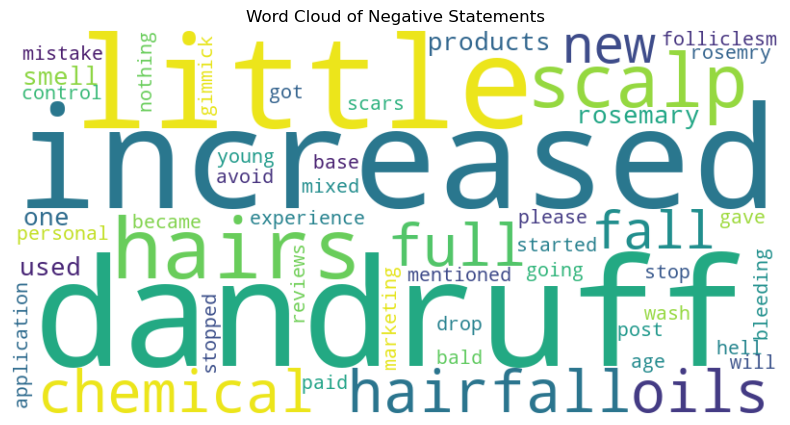

In [59]:
custom_stopwords_negative = set(STOPWORDS)
custom_stopwords_negative.update(['product', 'using', 'coconut', 'oil', 'hair', 'improvement'])

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', stopwords = custom_stopwords_negative, max_words = 50).generate(negative)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Statements')
plt.show()





<br>
In the context of the `wordcloud.words_` attribute in the WordCloud library, the `frequency` of each word refers to its relative importance in the text compared to other words. 
<br>
When generating a word cloud, words that appear more frequently in the input text are typically displayed larger and more prominently in the visualization. The frequency value represents the normalized importance of each word within the provided text.
<br>
For example, if the word "love" appears more frequently in the input text compared to other words, its frequency value would be higher, and it would be displayed larger in the word cloud visualization. Conversely, less frequent words would have lower frequency values and appear smaller in the visualization.
<br>


In [60]:
word_freq = wordcloud.words_

for word, freq in word_freq.items():
    print(f"{word}: {freq}")

dandruff: 1.0
increased: 1.0
little: 1.0
hairs: 0.6666666666666666
scalp: 0.6666666666666666
hairfall: 0.6666666666666666
full: 0.6666666666666666
chemical: 0.6666666666666666
oils: 0.6666666666666666
fall: 0.6666666666666666
new: 0.6666666666666666
products: 0.6666666666666666
used: 0.6666666666666666
rosemary: 0.6666666666666666
smell: 0.6666666666666666
one: 0.6666666666666666
personal: 0.3333333333333333
experience: 0.3333333333333333
mistake: 0.3333333333333333
became: 0.3333333333333333
bald: 0.3333333333333333
started: 0.3333333333333333
going: 0.3333333333333333
young: 0.3333333333333333
age: 0.3333333333333333
got: 0.3333333333333333
scars: 0.3333333333333333
bleeding: 0.3333333333333333
post: 0.3333333333333333
application: 0.3333333333333333
wash: 0.3333333333333333
hell: 0.3333333333333333
please: 0.3333333333333333
stop: 0.3333333333333333
base: 0.3333333333333333
rosemry: 0.3333333333333333
mixed: 0.3333333333333333
drop: 0.3333333333333333
mentioned: 0.3333333333333333
g

## Positive feedback

In [51]:
positive = df1[df1['ratings'].isin([4.0, 5.0])]['statements']
positive = ' '.join(positive)
positive = positive.lower()
positive

'good delivery & product the mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it\'s fragnce is also gentle.and it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem. a great product to reduce hairfall we\'ll see the effect later as off now i like it\'s fragrance and feel , was using onion 🧅 oil before and it\'s effective.  so , i\'m sticking with mama-earth products . good product good hair oil for haifall hair fall did reduce a bit after using this oil, not to a great extent but good enough use karke pta chlega oil is gud ..used 4 times ..i can only tell the results after the bottle finished i am applying it twice a week. it is non- sticky and makes my hair soft and shiny after wash. it has a nice applicator which makes oil to go to roots and activate its goodness. very good 👍 product i really like this product, 

<br>

Need to remove the emojis from statement 

In [52]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-B
                           u"\U0001F900-\U0001F9FF"  # Supplemental Arrows-A
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F0A0-\U0001F0FF"  # Playing Cards
                           u"\U0001F170-\U0001F19A"  # Enclosed Alphanumeric Supplement
                           u"\U0001F200-\U0001F251"  # Enclosed Ideographic Supplement
                           u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-B
                           u"\U0001F900-\U0001F9FF"  # Supplemental Arrows-A"
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A"
                           u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Pictographs"
                           u"\U0001F0A0-\U0001F0FF"  # Playing Cards"
                           u"\U0001F170-\U0001F19A"  # Enclosed Alphanumeric Supplement"
                           u"\U0001F200-\U0001F251"  # Enclosed Ideographic Supplement"
                           u"\U00002764"               # Heart emoji (❤️)
                           u"\U0000270C"               # Victory emoji (✌️)
                           u"\U00002705"               # Check mark emoji (✅)
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)



In [53]:
positive = df1[df1['ratings'].isin([4.0, 5.0])]['statements']
positive = ' '.join(positive)
positive = positive.lower()
positive = remove_emojis(positive)
positive

'good delivery & product the mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it\'s fragnce is also gentle.and it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem. a great product to reduce hairfall we\'ll see the effect later as off now i like it\'s fragrance and feel , was using onion  oil before and it\'s effective.  so , i\'m sticking with mama-earth products . good product good hair oil for haifall hair fall did reduce a bit after using this oil, not to a great extent but good enough use karke pta chlega oil is gud ..used 4 times ..i can only tell the results after the bottle finished i am applying it twice a week. it is non- sticky and makes my hair soft and shiny after wash. it has a nice applicator which makes oil to go to roots and activate its goodness. very good  product i really like this product, hi

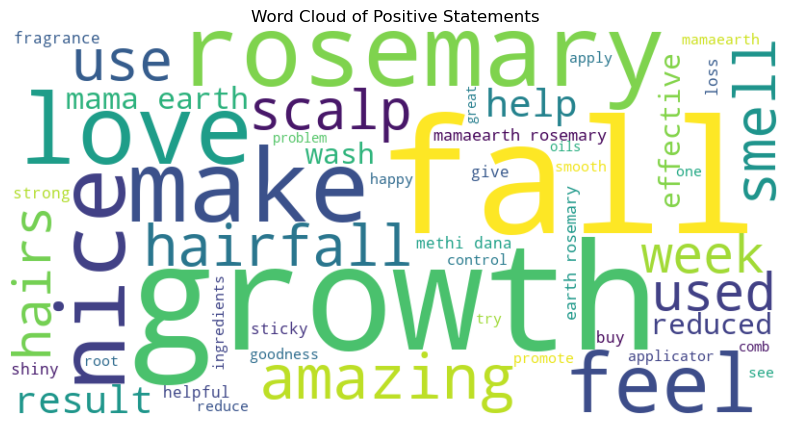

In [54]:
custom_stopwords_positive = set(STOPWORDS)
custom_stopwords_positive.update(['product', 'good', 'hair', 'using', 'oil', 'really'])

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', stopwords = custom_stopwords_positive, max_words = 50).generate(positive)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Statements')
plt.show()



In [55]:
# Get the frequencies of each word
word_freq = wordcloud.words_

# Display the frequencies
for word, freq in word_freq.items():
    print(f"{word}: {freq}")

fall: 1.0
growth: 0.8636363636363636
rosemary: 0.5909090909090909
make: 0.5909090909090909
love: 0.5454545454545454
nice: 0.5
feel: 0.45454545454545453
amazing: 0.45454545454545453
hairfall: 0.4090909090909091
use: 0.4090909090909091
smell: 0.4090909090909091
scalp: 0.4090909090909091
used: 0.36363636363636365
week: 0.36363636363636365
hairs: 0.36363636363636365
result: 0.36363636363636365
help: 0.36363636363636365
mama earth: 0.36363636363636365
effective: 0.3181818181818182
wash: 0.3181818181818182
reduced: 0.3181818181818182
mamaearth rosemary: 0.3181818181818182
earth rosemary: 0.3181818181818182
helpful: 0.2727272727272727
fragrance: 0.2727272727272727
sticky: 0.2727272727272727
shiny: 0.2727272727272727
buy: 0.2727272727272727
give: 0.2727272727272727
strong: 0.2727272727272727
loss: 0.2727272727272727
methi dana: 0.2727272727272727
mamaearth: 0.22727272727272727
control: 0.22727272727272727
applicator: 0.22727272727272727
reduce: 0.22727272727272727
see: 0.22727272727272727
good

Now, we will delve into the specific statements made by customers based on the frequencies observed in our word clouds.

In [64]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('fall.*')].reset_index(drop = True)['statements']

0                                                                                                              The mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it's fragnce is also gentle.And it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem.
1                                                                                                                                                                                                                                                                                                                                                                                                      A great product to reduce hairfall
2                                                                                                                                                   

In [14]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('control.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,4.0,Everything you should know about mamaearth rosemary hair oil,2023-10-27,The mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it's fragnce is also gentle.And it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem.,October
1,5.0,No regrets after buying this,2023-09-02,This hair oil is so perfect for me . I have used so many products but nothing had happened then I have interact with this appox one month .After using this my hairfall get controlled make my hair smooth which was frizzy ago .,September
2,5.0,Best Oil,2023-09-01,Magical oil for hair fall controls . Must try. Really Best results. I using this product last 1 Month magical results.,September
3,5.0,Very good,2023-08-26,"I have hair fall problems. so , i used many oils, but not work . My friend told me to use Rosemary oil. After using my hairs is becomes strong and helps to control hair fall. Really good. It's naturally crafted by methi dans and curry leaves.",August
4,5.0,A caring and Nice product,2023-08-08,"Recently I got Mamaearth Rosemary hair oil . As mentioned on pack about all effective, good ingredients, we started using it from day one.We are happy and satisfied with the results as it effectively controls hair loss and also nourish the scalp on using in daily routine.",August
5,5.0,Non sticky and effective,2023-08-03,As we all know rosemary is really gud for controlling hairfall...this Mamaearth rosemary oil is really very gud and effective. it is non sticky too...it has a very strong smell of rosemary,August
6,5.0,Good,2023-07-22,Very good product. This oil is amazing. For hair growth and control hair fall.,July
7,5.0,Very useful for hair growth,2023-07-17,presence of rosemary and methi dana helps in controlling hair fall nd promotes growth of new hairs,July
8,5.0,very effective,2023-07-17,the presence of methi dana in this oil not only promotes hair growth but also helps in controlling hair fall with few wash only,July
9,5.0,Controls hair fall,2023-07-08,I am using this Mamaearth Rosemary and Methi Dana hair growth oil from last few days and this oil has controlled my hair fall to an extent.,July


In [15]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('promot.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,5.0,Reduce hair fall,2023-09-20,This mamaearth rosemary hair growth oil is like miracle on hair stop hair fall promote hair growth work on hair thinning most important it's affordable and budget friendly over all quality is superb go for it,September
1,5.0,Very useful for hair growth,2023-07-17,presence of rosemary and methi dana helps in controlling hair fall nd promotes growth of new hairs,July
2,5.0,very effective,2023-07-17,the presence of methi dana in this oil not only promotes hair growth but also helps in controlling hair fall with few wash only,July
3,5.0,Rosemary,2023-07-08,Consistently using it from past few days . Rosemary in it prevents hairfall and promotes hair growth .Useful product,July
4,5.0,Affordable,2023-07-08,I like it's fragranceAnd it's have scalp oiling cap which helps me to oil my scalpAlso it's have necessary ingredients which stop the hair fall and promote hair growth,July


In [16]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('frag.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,4.0,Everything you should know about mamaearth rosemary hair oil,2023-10-27,The mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it's fragnce is also gentle.And it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem.,October
1,5.0,Smeels Awesome,2023-10-20,"We'll see the effect later as off now I like it's fragrance and feel , was using onion 🧅 oil before and it's effective. So , I'm sticking with Mama-Earth products .",October
2,4.0,Good oil non sticky..,2023-08-17,feels good..the rosemary has a lovely fragrance..quite happy with the after wash feel too..am applying it twice a week. It is not sticky…its goodness from root to tip.,August
3,5.0,Very nice,2023-08-14,"it's light too,not heavy on hair..feels good..the rosemary has a lovely fragrance..quite happy with the after wash feel too..good buy",August
4,5.0,Good,2023-08-12,Nice fragrance,August
5,5.0,Affordable,2023-07-08,I like it's fragranceAnd it's have scalp oiling cap which helps me to oil my scalpAlso it's have necessary ingredients which stop the hair fall and promote hair growth,July
6,5.0,Amazing oil,2023-07-03,"Amazing oil reduces hairfall ,strengthen the hair . Wonderful fragrance and many much more .... i recommend to use at once and u will see the benefits",July


In [17]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('stic.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,5.0,Smeels Awesome,2023-10-20,"We'll see the effect later as off now I like it's fragrance and feel , was using onion 🧅 oil before and it's effective. So , I'm sticking with Mama-Earth products .",October
1,5.0,Fantastic,2023-10-01,I am applying it twice a week. It is non- sticky and makes my hair soft and shiny after wash. It has a nice applicator which makes oil to go to roots and activate its goodness.,October
2,4.0,Good oil non sticky..,2023-08-17,feels good..the rosemary has a lovely fragrance..quite happy with the after wash feel too..am applying it twice a week. It is not sticky…its goodness from root to tip.,August
3,5.0,Non sticky and effective,2023-08-03,As we all know rosemary is really gud for controlling hairfall...this Mamaearth rosemary oil is really very gud and effective. it is non sticky too...it has a very strong smell of rosemary,August
4,5.0,Natural treatment to dry hair,2023-08-02,I am applying it twice a week. It is not sticky and makes my hair soft and shiny after wash. It has a nice applicator which makes oil reach to root and activate its goodness from root to tip.,August
5,5.0,Really very effective,2023-07-10,"I tried mamaearth oil and apply it everyday. I have found this oil is not sticky, light and very effective. After few weeks i feel my hairfall had reduced and even my hair also regrowth.",July
6,5.0,Smells nice,2023-07-08,It is so easy to apply. Hands does not get sticky. Smells nice,July


In [18]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('natu.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,5.0,Very good,2023-08-26,"I have hair fall problems. so , i used many oils, but not work . My friend told me to use Rosemary oil. After using my hairs is becomes strong and helps to control hair fall. Really good. It's naturally crafted by methi dans and curry leaves.",August
1,5.0,A must buy to nourish weak hairs,2023-07-07,"This product is a hair savior with its natural , toxin free formula and the goodness of rosemary, my hair feels stronger, and I trust mamaearth for quality products. I am in love with this product makes my scalp feel nourished, and just twice a week of use has reduced my hair fall.",July
2,5.0,Great,2023-07-05,"First and foremost I love the natural ingredients used in this oil. It contains a blend of essential oils, such as coconut oil, castor oil, and rosemary oil.",July


In [20]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('ingr.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,5.0,A caring and Nice product,2023-08-08,"Recently I got Mamaearth Rosemary hair oil . As mentioned on pack about all effective, good ingredients, we started using it from day one.We are happy and satisfied with the results as it effectively controls hair loss and also nourish the scalp on using in daily routine.",August
1,5.0,Very effective,2023-07-23,This rosemerry hair oil has daana methi ingredients in it. Its very good for hair fall. Ot boost strength to hair and keeps the scalp and hair clean and healthy. My hair fall has reduced a lot and hair are much healthier too. Very happy with the buy.,July
2,5.0,Fantastic,2023-07-15,I really love this mamaearth rosemary oil packed with methi dana vitamin e and lots of powerful ingredients to give nutrition to your hair and make it strong shiny and beautiful and the best part it's very budget friendly and is value for money so don't wait just have it,July
3,5.0,Affordable,2023-07-08,I like it's fragranceAnd it's have scalp oiling cap which helps me to oil my scalpAlso it's have necessary ingredients which stop the hair fall and promote hair growth,July
4,5.0,Great,2023-07-05,"First and foremost I love the natural ingredients used in this oil. It contains a blend of essential oils, such as coconut oil, castor oil, and rosemary oil.",July


In [21]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('methi.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,5.0,Very good,2023-08-26,"I have hair fall problems. so , i used many oils, but not work . My friend told me to use Rosemary oil. After using my hairs is becomes strong and helps to control hair fall. Really good. It's naturally crafted by methi dans and curry leaves.",August
1,5.0,Very effective,2023-07-23,This rosemerry hair oil has daana methi ingredients in it. Its very good for hair fall. Ot boost strength to hair and keeps the scalp and hair clean and healthy. My hair fall has reduced a lot and hair are much healthier too. Very happy with the buy.,July
2,5.0,Very useful for hair growth,2023-07-17,presence of rosemary and methi dana helps in controlling hair fall nd promotes growth of new hairs,July
3,5.0,very effective,2023-07-17,the presence of methi dana in this oil not only promotes hair growth but also helps in controlling hair fall with few wash only,July
4,5.0,Fantastic,2023-07-15,I really love this mamaearth rosemary oil packed with methi dana vitamin e and lots of powerful ingredients to give nutrition to your hair and make it strong shiny and beautiful and the best part it's very budget friendly and is value for money so don't wait just have it,July
5,5.0,Hair growth oil,2023-07-13,"It contains methi to nourishes hair , has healthy contents, keep hair silky also , helpful in hair growth",July
6,5.0,Nyc product,2023-07-09,Dis hair growth oil is very helpful in regrowing hair on scalp for it is helpful for those who have thin hairs... It is also containing methi Dana which gives shine to our hairs.,July


In [22]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('impro.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,5.0,Awesome Product for Hair Growth,2023-07-31,This oil has been amazing for my hair! It has a pleasant scent and leaves my hair feeling nourished and healthier. I've noticed reduced hair fall and improved scalp condition.,July
1,5.0,Amazing product,2023-07-08,"Amazing product I recently tried Mama Earth Rosemary Oil and it has been amazing for my hair! The oil has a pleasant scent and leaves my hair feeling nourished and healthier. I've noticed reduced hair fall and improved scalp condition since using it. The packaging is convenient and the oil is easy to apply. Overall, I highly recommend Mama Earth Rosemary Oil for anyone looking to improve their hair and scalp health.",July


In [24]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('shin.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,5.0,Fantastic,2023-10-01,I am applying it twice a week. It is non- sticky and makes my hair soft and shiny after wash. It has a nice applicator which makes oil to go to roots and activate its goodness.,October
1,5.0,Happy to use this,2023-09-30,This hair oil is sooo good. It makes hair shiny and smooth.,September
2,5.0,Soft and smooth,2023-09-12,It gives hair shine and smoothness.A very nice product for hair care.,September
3,5.0,Natural treatment to dry hair,2023-08-02,I am applying it twice a week. It is not sticky and makes my hair soft and shiny after wash. It has a nice applicator which makes oil reach to root and activate its goodness from root to tip.,August
4,5.0,Effective,2023-07-19,Yes you can definitely go for the product as it make hair smooth and shiny. Quality was just awesome..... I have observed my hair growth became somewhat fast too...,July
5,5.0,Fantastic,2023-07-15,I really love this mamaearth rosemary oil packed with methi dana vitamin e and lots of powerful ingredients to give nutrition to your hair and make it strong shiny and beautiful and the best part it's very budget friendly and is value for money so don't wait just have it,July
6,5.0,Hair growth oil,2023-07-11,I like this oil because my hair fall has reduced. The volume of my hair has grown up. There is a different shine in my hair so I am happy with this oil.,July
7,5.0,Nyc product,2023-07-09,Dis hair growth oil is very helpful in regrowing hair on scalp for it is helpful for those who have thin hairs... It is also containing methi Dana which gives shine to our hairs.,July
8,5.0,This is mamaearth oil.,2023-07-05,"Mamaearth hair oil is good for our hair , It makes hair strong and shiny, It's cheap too.",July
9,5.0,Best hair oil,2023-07-03,Fragrance of this oil is good and it give shine in hair and good for hair growth.,July


In [25]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('smooth.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,5.0,Happy to use this,2023-09-30,This hair oil is sooo good. It makes hair shiny and smooth.,September
1,5.0,Happy to use this,2023-09-27,It made my hairs smooth.....shell of oil doesn't stay after wash so don't worry about the bad smell of oil,September
2,5.0,Soft and smooth,2023-09-12,It gives hair shine and smoothness.A very nice product for hair care.,September
3,5.0,No regrets after buying this,2023-09-02,This hair oil is so perfect for me . I have used so many products but nothing had happened then I have interact with this appox one month .After using this my hairfall get controlled make my hair smooth which was frizzy ago .,September
4,5.0,Effective,2023-07-19,Yes you can definitely go for the product as it make hair smooth and shiny. Quality was just awesome..... I have observed my hair growth became somewhat fast too...,July
5,5.0,Worth buying product,2023-07-15,I really love this Rosemary hair growth oil ..worth buying product and it’s not strong very good scent and make ur hair smooth and soft ..the applicator is very helpful to apply oil .. must buy 👍🏻,July


In [26]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('bald.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Not good,2023-10-31,"Its my personal experience, I did mistake of using this oil.....After using this oil, I became bald....All hairs started going in young age by this oil",October


In [28]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('scar.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Spoilt my scalp,2023-10-30,I got scalp scars and bleeding post application and hair wash.. dandruff increased like hell and increased my hairfall . please stop using this product as it's full of chemical,October


In [29]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('dand.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Spoilt my scalp,2023-10-30,I got scalp scars and bleeding post application and hair wash.. dandruff increased like hell and increased my hairfall . please stop using this product as it's full of chemical,October
1,1.0,Waste of money,2023-10-08,"The product has Coconut oil as base with just a little rosemry and other oils . So it's just a coconut oil mixed with little drop of Oils mentioned . . Gave me more dandruff, hair fall not stopped and no new hair in hair folliclesm Just a marketing Gimmick and OIL HAS NOTHING LIKE NEW HAIRS OR HAIR FALL CONTROL. .Avoid paid reviews in such products as it will impact your pocket during these Inflation times",October


In [30]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('coco.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Waste of money,2023-10-08,"The product has Coconut oil as base with just a little rosemry and other oils . So it's just a coconut oil mixed with little drop of Oils mentioned . . Gave me more dandruff, hair fall not stopped and no new hair in hair folliclesm Just a marketing Gimmick and OIL HAS NOTHING LIKE NEW HAIRS OR HAIR FALL CONTROL. .Avoid paid reviews in such products as it will impact your pocket during these Inflation times",October


In [31]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('impro.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,2.0,Not buying again,2023-09-06,Loss project for me. I have no improvement on my hair.,September
1,1.0,Waste of money,2023-08-28,I have been using this product for last one month. I have not noticed any improvement despite my hairfall Increased. So I dumped this product.,August


In [32]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('other.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Waste of money,2023-10-08,"The product has Coconut oil as base with just a little rosemry and other oils . So it's just a coconut oil mixed with little drop of Oils mentioned . . Gave me more dandruff, hair fall not stopped and no new hair in hair folliclesm Just a marketing Gimmick and OIL HAS NOTHING LIKE NEW HAIRS OR HAIR FALL CONTROL. .Avoid paid reviews in such products as it will impact your pocket during these Inflation times",October
1,2.0,Not pure rosemary oil,2023-09-10,I have used other rosemary oil products and I could tell just my smell and texture that it is not pure one and very little percentage of this oil has rosemary mixture.,September


In [37]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('con.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Waste of money,2023-10-08,"The product has Coconut oil as base with just a little rosemry and other oils . So it's just a coconut oil mixed with little drop of Oils mentioned . . Gave me more dandruff, hair fall not stopped and no new hair in hair folliclesm Just a marketing Gimmick and OIL HAS NOTHING LIKE NEW HAIRS OR HAIR FALL CONTROL. .Avoid paid reviews in such products as it will impact your pocket during these Inflation times",October


In [38]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('mont.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Waste of money,2023-08-28,I have been using this product for last one month. I have not noticed any improvement despite my hairfall Increased. So I dumped this product.,August


In [42]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('fal.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Spoilt my scalp,2023-10-30,I got scalp scars and bleeding post application and hair wash.. dandruff increased like hell and increased my hairfall . please stop using this product as it's full of chemical,October
1,1.0,Waste of money,2023-10-08,"The product has Coconut oil as base with just a little rosemry and other oils . So it's just a coconut oil mixed with little drop of Oils mentioned . . Gave me more dandruff, hair fall not stopped and no new hair in hair folliclesm Just a marketing Gimmick and OIL HAS NOTHING LIKE NEW HAIRS OR HAIR FALL CONTROL. .Avoid paid reviews in such products as it will impact your pocket during these Inflation times",October
2,1.0,Waste of money,2023-08-28,I have been using this product for last one month. I have not noticed any improvement despite my hairfall Increased. So I dumped this product.,August


In [43]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('scal.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Spoilt my scalp,2023-10-30,I got scalp scars and bleeding post application and hair wash.. dandruff increased like hell and increased my hairfall . please stop using this product as it's full of chemical,October
1,1.0,Not good,2023-07-28,"Full of chemical, so harm , my scalp are so itchy after I used this",July


In [44]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('pai.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Waste of money,2023-10-08,"The product has Coconut oil as base with just a little rosemry and other oils . So it's just a coconut oil mixed with little drop of Oils mentioned . . Gave me more dandruff, hair fall not stopped and no new hair in hair folliclesm Just a marketing Gimmick and OIL HAS NOTHING LIKE NEW HAIRS OR HAIR FALL CONTROL. .Avoid paid reviews in such products as it will impact your pocket during these Inflation times",October


In [45]:
df1[df1['ratings'].isin([1.0, 2.0]) & df1['statements'].str.contains('revi.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,1.0,Waste of money,2023-10-08,"The product has Coconut oil as base with just a little rosemry and other oils . So it's just a coconut oil mixed with little drop of Oils mentioned . . Gave me more dandruff, hair fall not stopped and no new hair in hair folliclesm Just a marketing Gimmick and OIL HAS NOTHING LIKE NEW HAIRS OR HAIR FALL CONTROL. .Avoid paid reviews in such products as it will impact your pocket during these Inflation times",October


In [46]:
df1[df1['ratings'].isin([4.0, 5.0]) & df1['statements'].str.contains('good.*')].reset_index(drop = True)

,ratings,short_state,date,statements,month
0,4.0,Everything you should know about mamaearth rosemary hair oil,2023-10-27,The mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it's fragnce is also gentle.And it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem.,October
1,4.0,Works as advertised,2023-10-06,"Hair fall did reduce a bit after using this oil, not to a great extent but good enough",October
2,5.0,Fantastic,2023-10-01,I am applying it twice a week. It is non- sticky and makes my hair soft and shiny after wash. It has a nice applicator which makes oil to go to roots and activate its goodness.,October
3,5.0,Nice 👍👍👍,2023-09-30,Very good 👍 product,September
4,5.0,Happy to use this,2023-09-30,This hair oil is sooo good. It makes hair shiny and smooth.,September
5,5.0,Good,2023-09-17,Really good,September
6,4.0,Oil is good but I didn't receive the comb applier,2023-09-05,Oil is good but I didn't receive the comb applier pls send that also,September
7,4.0,Buy it,2023-08-29,It's quite good,August
8,5.0,Very good,2023-08-26,"I have hair fall problems. so , i used many oils, but not work . My friend told me to use Rosemary oil. After using my hairs is becomes strong and helps to control hair fall. Really good. It's naturally crafted by methi dans and curry leaves.",August
9,4.0,Good oil non sticky..,2023-08-17,feels good..the rosemary has a lovely fragrance..quite happy with the after wash feel too..am applying it twice a week. It is not sticky…its goodness from root to tip.,August


In [12]:
df1['statements']

0                                                                                                                                                                        Its my personal experience, I did mistake of using this oil.....After using this oil, I became bald....All hairs started going in young age by this oil
1                                                                                                                                               I got scalp scars and bleeding post application and hair wash.. dandruff increased like hell and increased my hairfall . please stop using this product as it's full of chemical
2                                                                                                                                                                                                                                                                                                        Good delivery & Product
3     The mamaearth rosemary hair oil

In [15]:
pd.set_option('display.max_rows', None)

In [18]:
''.join(df1['statements'])

'Its my personal experience, I did mistake of using this oil.....After using this oil, I became bald....All hairs started going in young age by this oilI got scalp scars and bleeding post application and hair wash.. dandruff increased like hell and increased my hairfall . please stop using this product as it\'s full of chemicalGood delivery & ProductThe mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it\'s fragnce is also gentle.And it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem.A great product to reduce hairfallWe\'ll see the effect later as off now I like it\'s fragrance and feel , was using onion 🧅 oil before and it\'s effective.  So , I\'m sticking with Mama-Earth products .Good ProductGood hair oil for haifallThe product has Coconut oil as base with just a little rosemry and other oils . So it\'s just

# Topic modelling 

In [76]:
reviews = df1['statements'].to_list()

In [77]:
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


# Tokenize and preprocess the reviews
stop_words = set(stopwords.words('english') + list(string.punctuation))
tokenized_reviews = [word_tokenize(review.lower()) for review in reviews]
tokenized_reviews = [[word for word in doc if word not in stop_words] for doc in tokenized_reviews]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_reviews]

# Build the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.083*"hair" + 0.054*"oil" + 0.042*"good" + 0.021*"growth" + 0.019*"nice"')
(1, '0.061*"hair" + 0.040*"product" + 0.034*".." + 0.024*"good" + 0.023*"rosemary"')
(2, '0.065*"hair" + 0.038*"oil" + 0.022*"amazing" + 0.022*"fall" + 0.020*"scalp"')
(3, '0.079*"hair" + 0.031*"oil" + 0.022*"growth" + 0.017*"fall" + 0.014*"rosemary"')
(4, '0.054*"oil" + 0.038*"hair" + 0.030*"rosemary" + 0.021*"using" + 0.019*"product"')


## What Does above output means?

The number in parentheses **(0 in this case)** represents the **topic number**.<br>

Each **word or term** in quotes ("hair", "oil", "good", etc.) represents a word that is **characteristic of that topic**.<br>

The number **before** each word (0.083, 0.054, 0.042, etc.) represents the probability of that word occurring in the topic. These probabilities are often normalized so that they **sum up to 1** for each topic.<br>

So, for topic 0, the words "hair", "oil", "good", "growth", and "nice" are significant, with "hair" having the highest probability of occurrence in that topic (0.083).<br>

## Visualizing the topics

In [80]:
pip install pyLDAvis


Note: you may need to restart the kernel to use updated packages.


`pyLDAvis` is a Python library used for visualizing the topics in a topic model, particularly for Latent Dirichlet Allocation (LDA). LDA is a popular technique for topic modeling, which is used to discover abstract topics in a collection of documents.

When you run topic modeling algorithms like LDA, you get a set of topics along with the distribution of words associated with each topic. `pyLDAvis` helps you visualize these topics and understand the relationships between them and the individual words within them.

Here's what `pyLDAvis` typically provides:

1. **Interpretability**: It offers an interactive visualization that allows users to explore the topics and the words associated with each topic. This helps in understanding the underlying structure of the corpus.

2. **Topic Proportions**: It shows the distribution of topics across the entire corpus. This gives an overview of the prevalence of each topic in the dataset.

3. **Word Distribution**: It displays the most relevant words for each topic along with their relevance scores. This helps in understanding the key terms associated with each topic.

4. **Interactive Visualization**: The visualization is interactive, allowing users to select and highlight topics and words of interest. This interactivity enhances the exploration and interpretation of the topic model.



In [79]:
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)

In [31]:
document_topics = lda_model[corpus]

# Print the topics for each document
for i, doc_topics in enumerate(document_topics):
    print(f"Document {i + 1}: {doc_topics}")

Document 1: [(0, 0.011178316), (1, 0.011205578), (2, 0.955051), (3, 0.011314888), (4, 0.011250198)]
Document 2: [(4, 0.9648756)]
Document 3: [(0, 0.05102802), (1, 0.7971476), (2, 0.05033088), (3, 0.05062662), (4, 0.050866947)]
Document 4: [(0, 0.9737992)]
Document 5: [(0, 0.040490706), (1, 0.83582336), (2, 0.041037295), (3, 0.04064827), (4, 0.04200037)]
Document 6: [(0, 0.010720999), (1, 0.010622493), (2, 0.010611868), (3, 0.010624226), (4, 0.95742047)]
Document 7: [(0, 0.26821452), (1, 0.06990336), (2, 0.067538135), (3, 0.06848935), (4, 0.52585465)]
Document 8: [(0, 0.83755904), (1, 0.040758308), (2, 0.040453326), (3, 0.04077271), (4, 0.040456623)]
Document 9: [(1, 0.9811007)]
Document 10: [(0, 0.018436642), (1, 0.9261407), (2, 0.018408796), (3, 0.018471442), (4, 0.018542456)]
Document 11: [(0, 0.04000731), (1, 0.04010397), (2, 0.040010545), (3, 0.040287923), (4, 0.83959025)]
Document 12: [(0, 0.016812837), (1, 0.016814372), (2, 0.9328416), (3, 0.016739132), (4, 0.016792092)]
Document

In [32]:
# Print the terms associated with each topic
topics_terms = lda_model.show_topics()
for topic_id, topic in topics_terms:
    print(f"Topic {topic_id}: {topic}")

Topic 0: 0.073*"hair" + 0.041*"good" + 0.039*"oil" + 0.026*".." + 0.016*"nice" + 0.014*"fall" + 0.013*"makes" + 0.011*"feel" + 0.011*"also" + 0.011*"sticky"
Topic 1: 0.053*"oil" + 0.045*"hair" + 0.024*"product" + 0.023*"rosemary" + 0.022*"good" + 0.021*"fall" + 0.015*"little" + 0.015*"earth" + 0.012*"smell" + 0.011*"mama"
Topic 2: 0.046*"oil" + 0.030*"hair" + 0.021*"used" + 0.021*".." + 0.017*"product" + 0.017*"using" + 0.013*"love" + 0.013*"results" + 0.009*"hairfall" + 0.009*"products"
Topic 3: 0.093*"hair" + 0.036*"oil" + 0.026*"growth" + 0.019*"rosemary" + 0.017*"product" + 0.017*"fall" + 0.015*"amazing" + 0.015*"mamaearth" + 0.013*"methi" + 0.012*"good"
Topic 4: 0.044*"hair" + 0.030*"oil" + 0.030*"product" + 0.029*"using" + 0.022*"rosemary" + 0.022*"'s" + 0.015*"like" + 0.015*"really" + 0.012*"hairfall" + 0.012*"..."


In [81]:
target_words = ["hair", "good", "oil", "nice", "fall", "makes", "feel", "also", "sticky"]

# Convert the text to lowercase for case-insensitive search
lowercase_text_list = [str(title).lower() for title in df1['statements'].to_list()]

# Initialize a dictionary to store the count of occurrences for each word
word_occurrences = {word: 0 for word in target_words}

# Count the occurrences of each target word in the text
for word in target_words:
    word_occurrences[word] = sum(1 for title in lowercase_text_list if word in title)

# Print the word occurrences
for word, count in word_occurrences.items():
    print(f"{word}: {count} occurrences")


hair: 73 occurrences
good: 32 occurrences
oil: 53 occurrences
nice: 11 occurrences
fall: 34 occurrences
makes: 6 occurrences
feel: 9 occurrences
also: 12 occurrences
sticky: 6 occurrences


In [82]:
# Get the top words and their probabilities for Topic 0
topic_words = lda_model.show_topic(0)

# Print the top words and their probabilities
print("Top words for Topic 0:")
for word, prob in topic_words:
    print(f"{word}: {prob}")


Top words for Topic 0:
hair: 0.06967266649007797
oil: 0.04273245111107826
product: 0.026331735774874687
good: 0.020393172279000282
growth: 0.019215745851397514
rosemary: 0.01745440438389778
use: 0.016890428960323334
fall: 0.014529741369187832
mamaearth: 0.01219911314547062
also: 0.009858270175755024


In [83]:

topic_words = lda_model.show_topic(1)

# Print the top words and their probabilities
print("Top words for Topic 1:")
for word, prob in topic_words:
    print(f"{word}: {prob}")


Top words for Topic 1:
hair: 0.07243455946445465
oil: 0.06224565580487251
..: 0.029079822823405266
using: 0.014755988493561745
love: 0.014462481252849102
growth: 0.013943345285952091
used: 0.01299729011952877
rosemary: 0.012196695432066917
fall: 0.01067358534783125
hairs: 0.010670059360563755


In [90]:


# Get the top words and their probabilities for Topic 0
topic_words = lda_model.show_topic(2)

# Print the top words and their probabilities
print("Top words for Topic 2:")
for word, prob in topic_words:
    print(f"{word}: {prob}")


Top words for Topic 2:
hair: 0.06778783351182938
oil: 0.03223273158073425
good: 0.024897275492548943
's: 0.01698584109544754
using: 0.015276952646672726
..: 0.014244185760617256
scalp: 0.014232238754630089
smell: 0.014222105033695698
fall: 0.013662494719028473
rosemary: 0.011472879908978939


In [92]:

topic_words = lda_model.show_topic(3)

# Print the top words and their probabilities
print("Top words for Topic 3:")
for word, prob in topic_words:
    print(f"{word}: {prob}")


Top words for Topic 3:
hair: 0.03987809270620346
rosemary: 0.03964017331600189
oil: 0.034066345542669296
fall: 0.015013354830443859
product: 0.013875224627554417
really: 0.01262902095913887
smell: 0.012605379335582256
using: 0.012585315853357315
helps: 0.012374400161206722
used: 0.012086008675396442


In [88]:

topic_words = lda_model.show_topic(4)

# Print the top words and their probabilities
print("Top words for Topic 4:")
for word, prob in topic_words:
    print(f"{word}: {prob}")


Top words for Topic 4:
hair: 0.06437762826681137
product: 0.04337863251566887
good: 0.039432086050510406
using: 0.023539064452052116
hairfall: 0.016997667029500008
loss: 0.016993973404169083
nice: 0.015476307831704617
great: 0.012839483097195625
reduce: 0.012818671762943268
fall: 0.01053512841463089


In [93]:
def identify_theme(topic_words):
    """
    Identify the dominant theme based on the top words associated with a topic.
    """
    # Define themes based on predefined criteria
    hair_care_keywords = ["hair", "oil", "growth", "fall", "scalp", "hairs", "hairfall", "loss"]
    product_satisfaction_keywords = ["product", "good", "nice", "great", "effective", "recommend"]
    usage_instructions_keywords = ["use", "using", "used", "instruction", "apply", "frequency"]
    brand_recognition_keywords = ["mamaearth", "brand", "mama", "earth", "review", "loyalty"]
    rosemary_keywords = ["rosemary", "smell", "helps"]

    # Count the occurrences of keywords associated with each theme
    theme_counts = {
        "Hair Care": sum(word in hair_care_keywords for word, _ in topic_words),
        "Product Satisfaction": sum(word in product_satisfaction_keywords for word, _ in topic_words),
        "Usage Instructions": sum(word in usage_instructions_keywords for word, _ in topic_words),
        "Brand Recognition": sum(word in brand_recognition_keywords for word, _ in topic_words),
        "Rosemary": sum(word in rosemary_keywords for word, _ in topic_words)
    }

    # Identify the dominant theme based on the theme with the highest count
    dominant_theme = max(theme_counts, key=theme_counts.get)
    
    return dominant_theme

# Assuming 'topic_words' contains the top words and their probabilities for each topic
# Loop through each topic and identify the dominant theme
for i in range(5):  # Assuming there are 5 topics
    topic_words = # Get top words for topic i
    dominant_theme = identify_theme(topic_words)
    print(f"Dominant Theme for Topic {i}: {dominant_theme}")


SyntaxError: invalid syntax (297278997.py, line 29)

In [89]:
def identify_theme(topic_words):
    """
    Identify the dominant theme based on the top words associated with a topic.
    """
    # Define themes based on predefined criteria
    hair_care_keywords = ["hair", "oil", "growth", "rosemary", "fall", "scalp"]
    product_satisfaction_keywords = ["product", "good", "satisfaction", "effective", "recommend"]
    usage_instructions_keywords = ["use", "instruction", "apply", "frequency"]
    brand_recognition_keywords = ["brand", "mamaearth", "mama", "earth", "review", "loyalty"]

    # Count the occurrences of keywords associated with each theme
    theme_counts = {
        "Hair Care": sum(word in hair_care_keywords for word, _ in topic_words),
        "Product Satisfaction": sum(word in product_satisfaction_keywords for word, _ in topic_words),
        "Usage Instructions": sum(word in usage_instructions_keywords for word, _ in topic_words),
        "Brand Recognition": sum(word in brand_recognition_keywords for word, _ in topic_words)
    }

    # Identify the dominant theme based on the highest count
    dominant_theme = max(theme_counts, key=theme_counts.get)
    
    return dominant_theme

# Assuming 'topic_words' contains the top words and their probabilities for Topic 0
dominant_theme = identify_theme(topic_words)
print("Dominant Theme for Topic 0:", dominant_theme)


Dominant Theme for Topic 0: Hair Care


In [94]:
top_words_per_topic = [
    [("hair", 0.06967266649007797), ("oil", 0.04273245111107826), ("product", 0.026331735774874687), ("good", 0.020393172279000282), ("growth", 0.019215745851397514), ("rosemary", 0.01745440438389778), ("use", 0.016890428960323334), ("fall", 0.014529741369187832), ("mamaearth", 0.01219911314547062), ("also", 0.009858270175755024)],
    [("hair", 0.07243455946445465), ("oil", 0.06224565580487251), ("..", 0.029079822823405266), ("using", 0.014755988493561745), ("love", 0.014462481252849102), ("growth", 0.013943345285952091), ("used", 0.01299729011952877), ("rosemary", 0.012196695432066917), ("fall", 0.01067358534783125), ("hairs", 0.010670059360563755)],
    [("hair", 0.06778783351182938), ("oil", 0.03223273158073425), ("good", 0.024897275492548943), ("'s", 0.01698584109544754), ("using", 0.015276952646672726), ("..", 0.014244185760617256), ("scalp", 0.014232238754630089), ("smell", 0.014222105033695698), ("fall", 0.013662494719028473), ("rosemary", 0.011472879908978939)],
    [("hair", 0.03987809270620346), ("rosemary", 0.03964017331600189), ("oil", 0.034066345542669296), ("fall", 0.015013354830443859), ("product", 0.013875224627554417), ("really", 0.01262902095913887), ("smell", 0.012605379335582256), ("using", 0.012585315853357315), ("helps", 0.012374400161206722), ("used", 0.012086008675396442)],
    [("hair", 0.06437762826681137), ("product", 0.04337863251566887), ("good", 0.039432086050510406), ("using", 0.023539064452052116), ("hairfall", 0.016997667029500008), ("loss", 0.016993973404169083), ("nice", 0.015476307831704617), ("great", 0.012839483097195625), ("reduce", 0.012818671762943268), ("fall", 0.01053512841463089)]
]


# Now you can use the top words for each topic to identify the dominant theme
for i, topic_words in enumerate(top_words_per_topic):
    dominant_theme = identify_theme(topic_words)
    print(f"Dominant Theme for Topic {i}: {dominant_theme}")

Dominant Theme for Topic 0: Hair Care
Dominant Theme for Topic 1: Hair Care
Dominant Theme for Topic 2: Hair Care
Dominant Theme for Topic 3: Hair Care
Dominant Theme for Topic 4: Hair Care


In [102]:
pd.set_option('display.max_rows', None) 

In [103]:
import re  # Import the regular expression module

target_words = ["hair", "oil", "product", "good", "growth", "rosemary", "use", "fall", "using",
                "love", "used", "fall", "hairs", "scalp", "smell", "helps", "hairfall", "loss",
                "nice", "great", "reduce"]


context_window = 15  # Set the number of words in the context window

# Convert the text to lowercase for case-insensitive search
lowercase_paragraphs = [str(paragraph).lower() for paragraph in df1['statements'].to_list()]

# Initialize a dictionary to store the positions and context of occurrences for each word
word_positions_and_context = {word: [] for word in target_words}

# Find the positions and context of each target word in the paragraphs
for word in target_words:
    for index, paragraph in enumerate(lowercase_paragraphs):
        # Using a regular expression to find word boundaries and ensure whole word matches
        matches = re.finditer(r'\b' + re.escape(word) + r'\b', paragraph)
        for match in matches:
            start_position = max(0, match.start() - context_window)
            end_position = min(len(paragraph), match.end() + context_window)
            context_text = paragraph[start_position:end_position]
            word_positions_and_context[word].append((index, context_text))

# Print the word positions and context
for word, positions_and_context in word_positions_and_context.items():
    print(f"{word} found at positions:")
    for position, context in positions_and_context:
        print(f"  Position {position}: {context}")
    print()


hair found at positions:
  Position 1: pplication and hair wash.. dandruf
  Position 3: earth rosemary hair oil is very ni
  Position 3:  you have long hair because it hel
  Position 3: r roots of the hair without any pr
  Position 7: good hair oil for haifal
  Position 8: more dandruff, hair fall not stopp
  Position 8: ped and no new hair in hair follic
  Position 8: no new hair in hair folliclesm jus
  Position 8: e new hairs or hair fall control. 
  Position 9: hair fall did reduc
  Position 12: y and makes my hair soft and shiny
  Position 14: oking for long hair
  Position 15: this hair oil is sooo go
  Position 15: good. it makes hair shiny and smoo
  Position 17: to the quality💓hair are thickening
  Position 19: with making my hair long, it gave 
  Position 21: earth rosemary hair growth oil is 
  Position 21: ike miracle on hair stop hair fall
  Position 21: e on hair stop hair fall promote h
  Position 21: r fall promote hair growth work on
  Position 21: growth work on hair 

In [105]:
full_statements = ["hair", "oil", "product", "good", "growth", "rosemary", "use", "fall", "using",
                "love", "used", "fall", "hairs", "scalp", "smell", "helps", "hairfall", "loss",
                "nice", "great", "reduce"]


# Iterate over the positions and contexts of "hair" and "oil"
for word in ["hair"]:
    for position, context in word_positions_and_context[word]:
        full_statement = df1.iloc[position]['statements']  # Assuming the column containing the text is named 'statements'
        full_statements.append(full_statement)

# Print the full statements
for statement in full_statements:
    print(statement)


hair
oil
product
good
growth
rosemary
use
fall
using
love
used
fall
hairs
scalp
smell
helps
hairfall
loss
nice
great
reduce
I got scalp scars and bleeding post application and hair wash.. dandruff increased like hell and increased my hairfall . please stop using this product as it's full of chemical
The mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it's fragnce is also gentle.And it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem.
The mamaearth rosemary hair oil is very nice which helps you to control hairfall and the oils consistency is also good and it's fragnce is also gentle.And it even comes with comb applicator which is very helpful if you have long hair because it helps you to directly oil your roots of the hair without any problem.
The mamaearth rosemary hair oil is very nice which helps you to contr

#### Summarizing the statements where the word "hair" is mentioned.

1. **Mixed Results**: Reviews for Mamaearth Rosemary Hair Oil vary greatly, with some users praising its effectiveness in reducing hair fall and promoting hair growth, while others experienced negative effects like increased dandruff and bleeding post-application.

2. **Texture and Fragrance**: Some users appreciated the oil's non-sticky texture and gentle fragrance, finding it pleasant to use and easy to apply. 

3. **Ingredient Critique**: Critics pointed out that the oil primarily consists of coconut oil with minimal rosemary and other beneficial oils, leading them to question its efficacy and labeling it as a marketing gimmick.

4. **Positive Outcomes**: Despite mixed reviews, several users reported positive outcomes such as reduced hair fall, improved hair texture, and noticeable hair growth, especially when used consistently over time.

5. **Recommendation Discrepancy**: Opinions on whether to recommend the product are divided, with some users suggesting it as a solution for hair issues, while others advise against its use due to negative experiences.

#### Ultimately, there are various approaches to understanding reviews. One approach involves labeling sentiments as positive, negative, or neutral, and then summarizing them accordingly. Another method includes creating word clouds or conducting topic modeling. Alternatively, one can combine all of these approaches to gain insights into the reviews.

#### Summarizing the reviews that I received after labeling them with sentiment.

**Positive reviews**

1. Positive reviews: Users express satisfaction with Mamaearth Rosemary Hair Oil, praising its effectiveness in controlling hair fall and improving hair quality.
2. Convenient application: The oil comes with a comb applicator, facilitating easy and direct application to the roots, especially beneficial for those with long hair.
3. Pleasant fragrance and texture: Users appreciate the gentle fragrance and non-sticky consistency of the oil, making it pleasant to use.
4. Visible results: Some users report reduced hair fall and improved hair texture after using the oil consistently for a few weeks.
5. Affordability and natural ingredients: Users highlight the budget-friendly price and the presence of natural ingredients like rosemary and methi dana, which are known for their benefits in promoting hair growth and reducing hair fall.

**Negative reviews**

1. Negative experience: The user experienced significant negative effects after using the oil, including baldness, scalp scars, bleeding post-application, increased dandruff, and intensified hair fall at a young age.
2. Lack of effectiveness: Despite the user's expectation for positive results, such as hair fall control and new hair growth, the oil did not deliver any noticeable improvements. It was perceived as just a marketing gimmick without any real benefits.
3. Product composition: The oil primarily consisted of coconut oil with minimal amounts of rosemary and other oils, suggesting that it was not as advertised and lacked the desired ingredients for hair care.
4. Adverse reactions: The user reported experiencing issues like increased dandruff, itching, and scalp irritation after using the oil, indicating potential harmful effects due to its chemical composition.
5. Discontinuation: Due to the lack of effectiveness and adverse reactions, the user decided to discontinue using the product after a month of use, deeming it a loss and warning others to avoid it.

**Rating Trend**

It is assumed that consumers might discovered a better alternative, or they didn't like the product because the rating was continuously decreasing.